In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_cpy=pd.read_csv("/kaggle/input/titanic/train.csv")
test_cpy = pd.read_csv("/kaggle/input/titanic/test.csv")
train_data=train_cpy.copy()
test_data=test_cpy.copy()
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_numeric=train_data[['Age','SibSp','Parch','Fare']]
train_category=train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

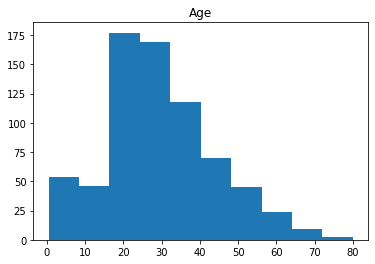

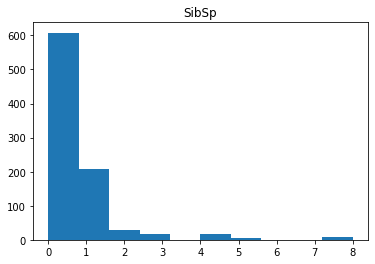

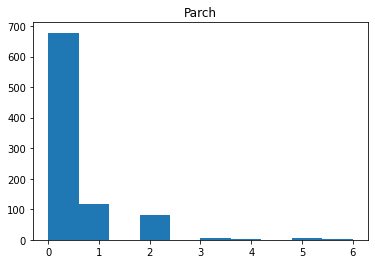

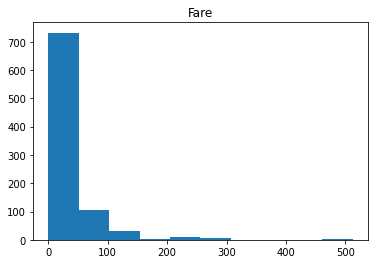

In [7]:
for i in train_numeric.columns:
    plt.hist(train_numeric[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

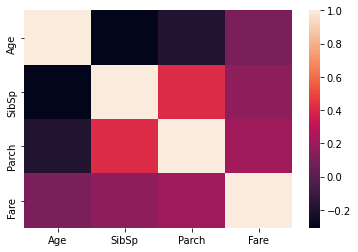

In [8]:
print(train_numeric.corr())
sns.heatmap(train_numeric.corr())

In [9]:
#average age,fare,parents,sibblings of people survived and not survived
#pivot table for survival vs numeric columns
pd.pivot_table(train_data,index='Survived',values=train_numeric.columns)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


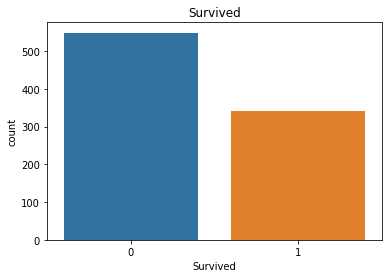

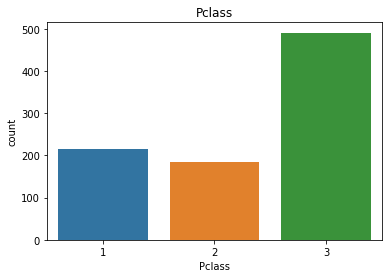

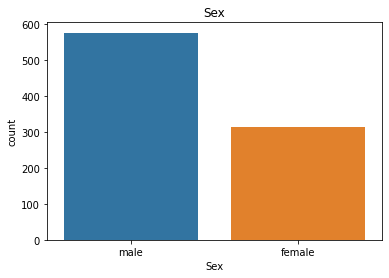

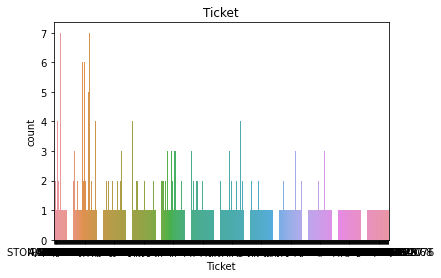

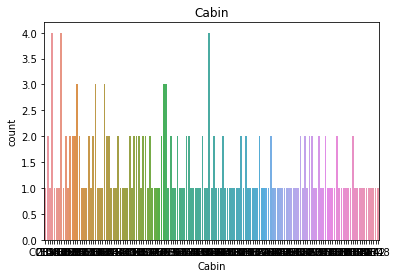

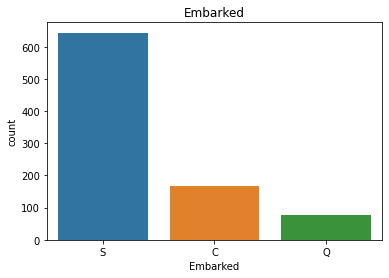

In [10]:
for i in train_category.columns:
    sns.countplot(x=train_category[i])
    plt.title(i)
    plt.show()

In [11]:
#pivot table for Categorical  columns
print(pd.pivot_table(train_data,index='Survived',columns='Pclass',values='PassengerId',aggfunc='count'))
print()
print(pd.pivot_table(train_data,index='Survived',columns='Sex',values='PassengerId',aggfunc='count'))
print()
print(pd.pivot_table(train_data,index='Survived',columns='Embarked',values='PassengerId',aggfunc='count'))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



In [12]:
train_data['CabinCount']=train_data.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
print(train_data['CabinCount'].value_counts())

0    687
1    180
2     16
3      6
4      2
Name: CabinCount, dtype: int64


In [13]:
train_data['Cabin']=train_data['Cabin'].apply(lambda x:str(x)[0].upper())
print(train_data['Cabin'].value_counts())
print(pd.pivot_table(train_data,index='Survived',columns='Cabin',values='Name',aggfunc='count'))

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64
Cabin       A     B     C     D     E    F    G      N    T
Survived                                                   
0         8.0  12.0  24.0   8.0   8.0  5.0  2.0  481.0  1.0
1         7.0  35.0  35.0  25.0  24.0  8.0  2.0  206.0  NaN


In [14]:
train_data.info()
train_data['Age']=train_data['Age'].fillna(train_data['Age'].median())
train_data.dropna(subset=['Embarked'],inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  CabinCount   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [15]:
train_data['Title']=train_data.Name.apply(lambda x:str(x).split(',')[1].split('.')[0])
train_data.drop('Name',axis=1,inplace=True)

In [16]:
train_data.drop(['PassengerId','Ticket'],axis=1,inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinCount,Title
0,0,3,male,22.0,1,0,7.2500,N,S,0,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,1,Mrs
2,1,3,female,26.0,0,0,7.9250,N,S,0,Miss
3,1,1,female,35.0,1,0,53.1000,C,S,1,Mrs
4,0,3,male,35.0,0,0,8.0500,N,S,0,Mr


In [17]:
test_data['Title']=test_data.Name.apply(lambda x:str(x).split(',')[1].split('.')[0])
test_data.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)
test_data['CabinCount']=test_data.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
test_data['Cabin']=test_data['Cabin'].apply(lambda x:str(x)[0].upper())
test_data['Age']=test_data['Age'].fillna(test_data['Age'].median())
test_data.dropna(subset=['Embarked'],inplace=True)

In [18]:
#train_data['Sex']=[0 if train_data['Sex'][i]=='male' else 1 for i in train_data.index]
#test_data['Sex']=[0 if test_data['Sex'][i]=='male' else 1 for i in test_data.index]

In [19]:
train_data.drop(['Cabin'],axis=1,inplace=True)
test_data.drop(['Cabin'],axis=1,inplace=True)

In [20]:
train_data.drop(['Title'],axis=1,inplace=True)
test_data.drop(['Title'],axis=1,inplace=True)

In [21]:
print(test_data.head())
print(train_data.head())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  CabinCount
0       3    male  34.5      0      0   7.8292        Q           0
1       3  female  47.0      1      0   7.0000        S           0
2       2    male  62.0      0      0   9.6875        Q           0
3       3    male  27.0      0      0   8.6625        S           0
4       3  female  22.0      1      1  12.2875        S           0
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  CabinCount
0         0       3    male  22.0      1      0   7.2500        S           0
1         1       1  female  38.0      1      0  71.2833        C           1
2         1       3  female  26.0      0      0   7.9250        S           0
3         1       1  female  35.0      1      0  53.1000        S           1
4         0       3    male  35.0      0      0   8.0500        S           0


In [22]:
dummiesSex=pd.get_dummies(train_data.Sex)
dummiesEmbarked=pd.get_dummies(train_data.Embarked)
mergedTrain=pd.concat([train_data,dummiesSex,dummiesEmbarked],axis='columns')
mergedTrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinCount,female,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,0,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,S,1,1,0,0,0,1
888,0,3,female,28.0,1,2,23.4500,S,0,1,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,1,0,1,1,0,0


In [23]:
dummiesSex=pd.get_dummies(test_data.Sex)
dummiesEmbarked=pd.get_dummies(test_data.Embarked)
mergedTest=pd.concat([test_data,dummiesSex,dummiesEmbarked],axis='columns')
mergedTest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinCount,female,male,C,Q,S
0,3,male,34.5,0,0,7.8292,Q,0,0,1,0,1,0
1,3,female,47.0,1,0,7.0000,S,0,1,0,0,0,1
2,2,male,62.0,0,0,9.6875,Q,0,0,1,0,1,0
3,3,male,27.0,0,0,8.6625,S,0,0,1,0,0,1
4,3,female,22.0,1,1,12.2875,S,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S,0,0,1,0,0,1
414,1,female,39.0,0,0,108.9000,C,1,1,0,1,0,0
415,3,male,38.5,0,0,7.2500,S,0,0,1,0,0,1
416,3,male,27.0,0,0,8.0500,S,0,0,1,0,0,1


In [24]:
finalTrain=mergedTrain.drop(['Sex','Embarked','male','C'],axis='columns')
finalTrain

,Survived,Pclass,Age,SibSp,Parch,Fare,CabinCount,female,Q,S
0,0,3,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,1
3,1,1,35.0,1,0,53.1000,1,1,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,0,1
887,1,1,19.0,0,0,30.0000,1,1,0,1
888,0,3,28.0,1,2,23.4500,0,1,0,1
889,1,1,26.0,0,0,30.0000,1,0,0,0


In [25]:
finalTest=mergedTest.drop(['Sex','Embarked','male','C'],axis='columns')
finalTest

,Pclass,Age,SibSp,Parch,Fare,CabinCount,female,Q,S
0,3,34.5,0,0,7.8292,0,0,1,0
1,3,47.0,1,0,7.0000,0,1,0,1
2,2,62.0,0,0,9.6875,0,0,1,0
3,3,27.0,0,0,8.6625,0,0,0,1
4,3,22.0,1,1,12.2875,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0,0,0,1
414,1,39.0,0,0,108.9000,1,1,0,0
415,3,38.5,0,0,7.2500,0,0,0,1
416,3,27.0,0,0,8.0500,0,0,0,1


In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked    418 non-null    object 
 7   CabinCount  418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 29.4+ KB


In [27]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].median())

In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked    418 non-null    object 
 7   CabinCount  418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 29.4+ KB


In [29]:
finalTest.info()
finalTest['Fare']=finalTest['Fare'].fillna(finalTest['Fare'].median())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        417 non-null    float64
 5   CabinCount  418 non-null    int64  
 6   female      418 non-null    uint8  
 7   Q           418 non-null    uint8  
 8   S           418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 24.1 KB


In [30]:
finalTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   CabinCount  418 non-null    int64  
 6   female      418 non-null    uint8  
 7   Q           418 non-null    uint8  
 8   S           418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 24.1 KB


In [31]:
train_dataX = finalTrain.iloc[:,1:].values
train_dataY = finalTrain.iloc[:,0].values

In [32]:
print(train_dataX.shape)
print(train_dataY.shape)
print(finalTest.shape)

(889, 9)
(889,)
(418, 9)


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_dataX= sc.fit_transform(train_dataX)
finalTest= sc.transform(finalTest)

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_dataX, train_dataY)

LogisticRegression()

In [35]:
y_pred = logreg.predict(finalTest)
y_pred.shape

(418,)

In [36]:
test_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [37]:

test_cpy['Fare']=test_cpy['Fare'].fillna(test_cpy['Fare'].median())
output = pd.DataFrame({'PassengerId': test_cpy.PassengerId, 'Survived':y_pred })
output.to_csv('my_submissionLR.csv', index=False)